In [1]:
import scipy.stats as stats
from math import sqrt
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm


In [2]:
def analyze_distribution(data, column_name):
    # Q-Q Plot
    sm.qqplot(data[column_name].dropna(), line='s')
    plt.title('Q-Q Plot for ' + column_name)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

    # Shapiro-Wilk Test
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(data[column_name].dropna())
    print('Shapiro-Wilk Test:')
    print('Statistic:', shapiro_test_statistic)
    print('p-value:', shapiro_p_value)
    print()
    print("-----------------------------------------------")
    # Kolmogorov-Smirnov Test
    ks_test_statistic, ks_p_value = stats.kstest(data[column_name].dropna(), 'norm')
    print('Kolmogorov-Smirnov Test:')
    print('Statistic:', ks_test_statistic)
    print('p-value:', ks_p_value)
    print()
 
 


In [4]:
sample_mean = 98.25
standard_deviation = 0.73
sample_size = 130
confidence_level = 0.99


In [5]:
sem = standard_deviation/ np.sqrt(sample_size)
sem

0.06402523540941313

In [6]:
z_value = norm.ppf((1 + confidence_level) / 2)
z_value

2.5758293035489004

In [7]:
moe = z_value* sem
moe

0.16491807753418303

In [8]:
upper_lim = sample_mean + moe
upper_lim


98.41491807753418

In [9]:
low_lim = sample_mean - moe
low_lim

98.08508192246582

In [10]:
ci= stats.norm.interval(0.99, sample_mean, sem)


In [11]:
print(f"Confidence Interval: ({ci[0]:.3f}, {ci[1]:.3f})")

Confidence Interval: (98.085, 98.415)


In [12]:
sample_mean = 5.4
standard_deviation = 3.1
sample_size= 500
confidence_level = 0.95


In [13]:
sem = standard_deviation/ np.sqrt(sample_size)
sem

0.13863621460498696

In [14]:
z_value = norm.ppf((1 + confidence_level) / 2)
z_value

1.959963984540054

In [15]:
moe = z_value* sem
moe

0.2717219875787403

In [16]:
upper_lim = sample_mean + moe
upper_lim

5.67172198757874

In [17]:
low_lim = sample_mean - moe
low_lim

5.12827801242126

In [18]:
ci = stats.norm.interval(0.95, sample_mean, sem)

In [19]:
print(f"Confidence Interval: ({ci[0]:.3f}, {ci[1]:.3f})")

Confidence Interval: (5.128, 5.672)


In [20]:
x_bar = 12.20 # sample mean
n = 40 # number of samples
sigma = 2.5 # sd of population
mu = 13.20 # Population mean

In [21]:
z = (x_bar - mu)/(sigma/sqrt(n))
z

-2.5298221281347035

In [22]:
p_value = 1-stats.norm.cdf(2.5298)
p_value

0.005706378045635119

In [23]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 4.Shear strength measurements derived from unconfined compression tests
for two types of soils gave the results shown in the following document (measurements in tons per square foot). 
Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [24]:
df = pd.read_csv("soil - Sheet1.csv")


In [25]:
df.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


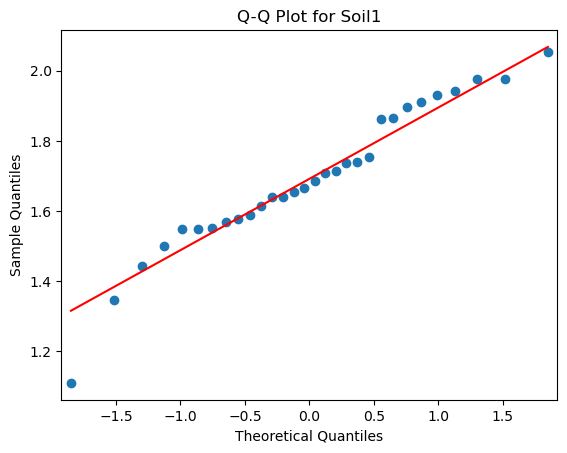

Shapiro-Wilk Test:
Statistic: 0.9605797529220581
p-value: 0.32050028443336487

-----------------------------------------------
Kolmogorov-Smirnov Test:
Statistic: 0.8776765503257683
p-value: 8.618461163766257e-28



In [26]:
analyze_distribution(df, "Soil1")

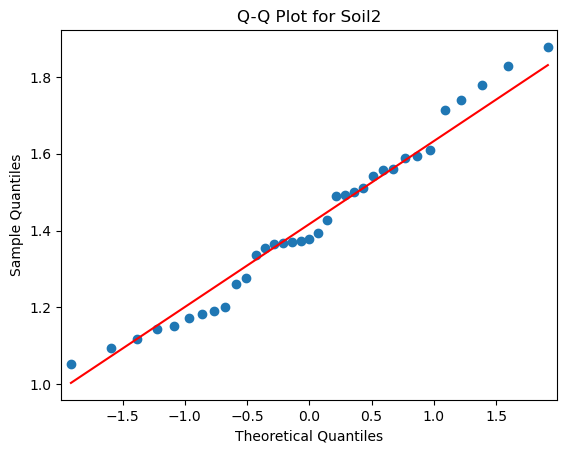

Shapiro-Wilk Test:
Statistic: 0.9684144258499146
p-value: 0.4011968970298767

-----------------------------------------------
Kolmogorov-Smirnov Test:
Statistic: 0.8538295039606199
p-value: 1.3279110155032839e-29



In [27]:
analyze_distribution(df, "Soil2")

In [28]:
t_statistic, p_value = stats.ttest_ind(df['Soil1'].dropna(), df['Soil2'].dropna(), equal_var=True)
print('T-Statistic:', t_statistic)
print('p-value:', p_value)

T-Statistic: 5.1681473319343345
p-value: 2.593228732352821e-06


In [29]:





# Check if the p-value is less than the significance level (e.g., 0.01) to reject the null hypothesis
significance_level = 0.01
if p_value < significance_level:
    print("The soils appear to differ with respect to average shear strength at the 1% significance level.")
else:
    print("There is no significant difference in average shear strength between the soils.")

The soils appear to differ with respect to average shear strength at the 1% significance level.


In [30]:
df1 = pd.read_csv("2015 PISA Test - Sheet1.csv")
df1

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [31]:
df1.groupby("Continent_Code")["Math"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [32]:
df1['AS_scores'] = df1[df1['Continent_Code'] == 'AS']['Math']
df1['EU_scores'] = df1[df1['Continent_Code'] == 'EU']['Math']

In [33]:
df1

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science,AS_scores,EU_scores
0,ALB,EU,63.252933,413.1570,405.2588,427.2250,NaN,413.1570
1,ARE,AS,90.500000,427.4827,433.5423,436.7311,427.4827,NaN
2,ARG,SA,68.043064,409.0333,425.3031,432.2262,NaN,NaN
3,AUS,OC,84.560519,493.8962,502.9006,509.9939,NaN,NaN
4,AUT,EU,83.940142,496.7423,484.8656,495.0375,NaN,496.7423
...,...,...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034,NaN,NaN
66,TUR,EU,53.744979,420.4540,428.3351,425.4895,NaN,420.4540
67,URY,SA,64.600000,417.9919,436.5721,435.3630,NaN,NaN
68,USA,NaN,74.554202,469.6285,496.9351,496.2424,NaN,NaN


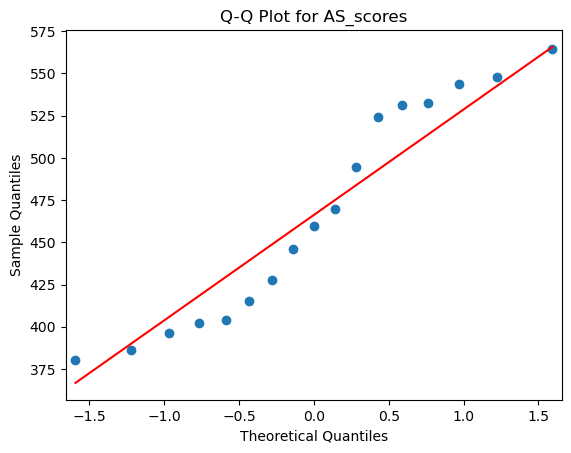

Shapiro-Wilk Test:
Statistic: 0.9046438932418823
p-value: 0.08126488327980042

-----------------------------------------------
Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0



In [34]:
analyze_distribution(df1, "AS_scores")

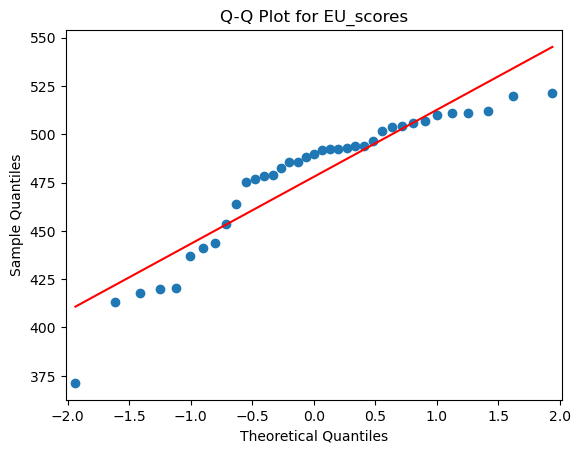

Shapiro-Wilk Test:
Statistic: 0.8730366826057434
p-value: 0.000569795782212168

-----------------------------------------------
Kolmogorov-Smirnov Test:
Statistic: 1.0
p-value: 0.0



In [35]:
analyze_distribution(df1, "EU_scores")

In [37]:
t_statistic, p_value = stats.ttest_ind(df1["AS_scores"].dropna() , df1["EU_scores"].dropna(), equal_var=True)
print('T-Statistic:', t_statistic)
print('p-value:', p_value)

T-Statistic: -0.870055317967983
p-value: 0.38826888111307345


In [38]:
significance_level = 0.025
if p_value < significance_level:
    print("there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries")
else:
    print("There is no significant difference (on the average) for the math scores among European (EU) and Asian (AS) countries")

There is no significant difference (on the average) for the math scores among European (EU) and Asian (AS) countries


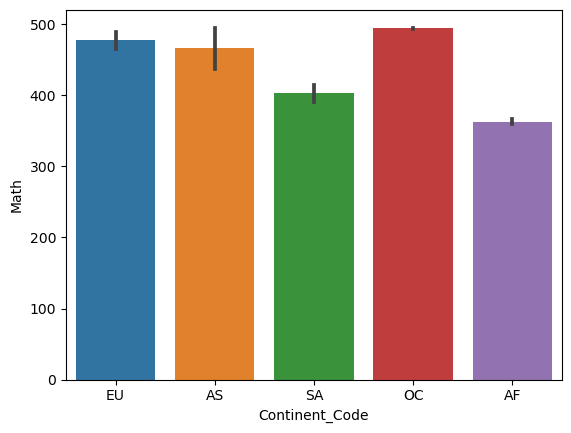

In [39]:
sns.barplot(x="Continent_Code", y="Math", data=df1, errorbar=('ci', 95));